In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx
/kaggle/input/car-price-prediction/CarPrice_Assignment.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
print("No of Car Name :" + str(len(df['CarName'].unique())))

No of Car Name :147


In [8]:
# Lets ignore CarName

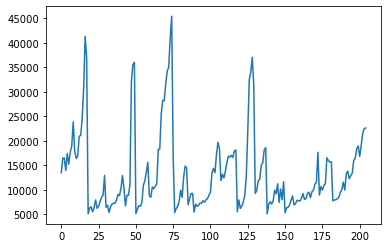

In [9]:
df['price'].plot()

In [10]:
df.drop(['CarName','car_ID'] , inplace = True, axis = 1)
df.shape

(205, 24)

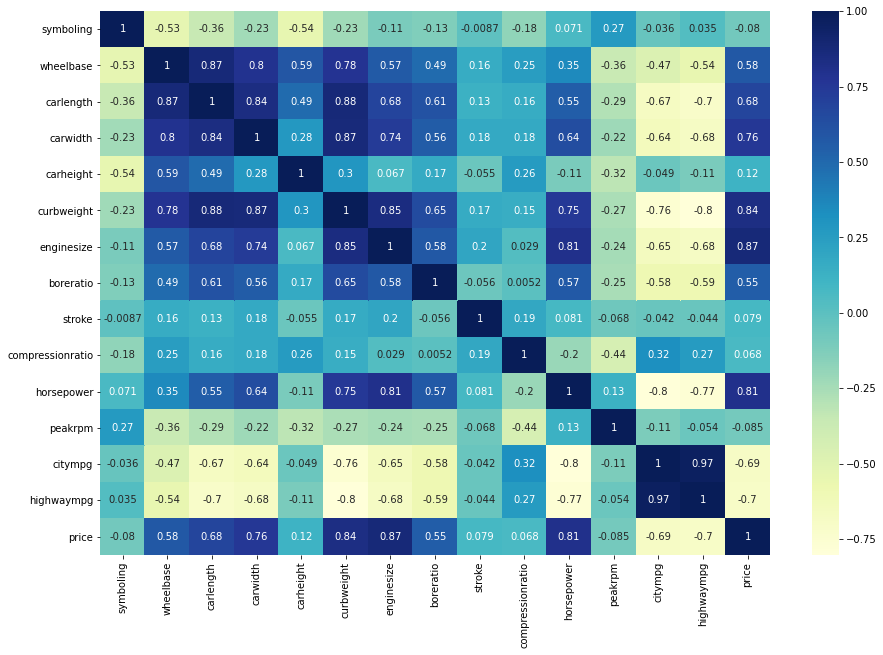

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , cmap="YlGnBu", annot=True)

In [12]:
data = pd.get_dummies(df, drop_first =True)
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [14]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [15]:
X = data.drop('price' , axis = 1)
y = df['price']

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(143, 43)
(62, 43)


In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [18]:
reg.score(X_train, y_train)

0.9546097702846614

In [19]:
reg.coef_

array([ 3.83659263e+02,  1.62880015e+02, -5.23811191e+01,  5.56436636e+02,
        1.47520161e+02,  4.80607938e+00,  1.51748490e+02, -9.07272907e+03,
       -6.77972410e+03, -8.63245138e+02,  1.06964049e+01,  1.90401421e+00,
       -9.33075464e+01,  7.18133631e+01, -6.33072864e+03,  1.40230714e+03,
       -5.95525090e+02, -3.71541647e+03, -3.56946975e+03, -3.09137558e+03,
       -4.72091677e+03,  1.46534800e+03,  3.06598821e+03,  8.94801700e+03,
       -1.13686838e-12, -2.01702028e+03,  3.34020546e+03,  3.60038871e+03,
       -4.33352180e+03,  5.35355735e+03, -1.33943617e+03,  4.87450863e+02,
       -8.47776017e+02, -4.54747351e-12, -9.53501862e+03,  5.35355735e+03,
        1.10121823e+01, -3.67426143e+02,  6.33072864e+03, -2.18156653e+03,
       -6.61068166e+00, -2.80523298e+03, -1.03000527e+03])

In [20]:
reg.intercept_

-16108.959990938938

In [21]:
y_pred = reg.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)



MSE : 12884772.56293274
RMSE : 3589.53653873766


In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.8048866502800809


## Lasso Regression

In [24]:
from sklearn import linear_model
lasso  = linear_model.Lasso(alpha=1 , max_iter= 3000)

lasso.fit(X_train, y_train)


Lasso(alpha=1, max_iter=3000)

In [25]:
lasso.score(X_train, y_train)


0.9545068182828951

In [26]:
y_pred_l = lasso.predict(X_test)


In [27]:
MSE  = mean_squared_error(y_test, y_pred_l)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_l)
print("R2 :" ,r2)

MSE : 12050700.48981238
RMSE : 3471.4118870874972
R2 : 0.8175169544084224


## Rigde regression

In [28]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [29]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [30]:
ridge.score(X_train, y_train)

0.9538260044872747

In [31]:
y_pred_r = ridge.predict(X_test)

In [32]:
MSE  = mean_squared_error(y_test, y_pred_r)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_r)
print("R2 :" ,r2)

MSE : 9892461.110761188
RMSE : 3145.228308209308
R2 : 0.8501990458219373
